# 一、Kmeans聚类

## 1.处理数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1 导入数据

In [2]:
data=pd.read_csv(r"E:\ML\Kmeans\iris.data")
data.columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm	","PetalWidthCm","Species"]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### 1.2 获取X数据集

In [3]:
for i in data.columns:
    print(data[i].dtype)
x_data=np.array(data.iloc[:,[0,2]]) #选取两类
y=np.array(data["Species"])
class_label={"Iris-virginica":0,"Iris-versicolor":1,"Iris-setosa":2}
for i in range(len(y)):
    y[i]=class_label[y[i]]

float64
float64
float64
float64
object


# 2. 实现K-means
1.设置簇数  
2.随机质心  
3.划分簇  
4.更新质心  
重复3.4直至收敛

### kmeans函数模块

In [4]:
def init_center(x_data,k=3):
    '''
    初始化质心
    x_data:x数据集
    k:类别数，default=3
    返回center:k*n
    '''
    m,n=x_data.shape
    center=np.random.rand(k,n)
    center[0]=x_data[0]
    for i in range(k-1):
        max_num=0
        max_id=0
        for j in range(m):
            if(dist(x_data[j],center[i])>max_num):
                max_id=j
                max_num=dist(x_data[j],center[i-1])
        center[i+1]=x_data[max_id]    
    return center

def dist(x,y):
    '''
    计算x和y的欧氏距离
    '''
    return ((x-y)**2).sum()**0.5

def class_divide(x_data,center,k=3):
    '''
    划分簇类
    x_data:数据集
    center:当前质心
    返回:classify x数据集对应的簇类
    '''
    m,n=x_data.shape
    classify=np.zeros(m).astype(int) 
    for i in range(m):
        Dist=np.zeros(k)
        for j in range(center.shape[0]):
            Dist[j]=dist(x_data[i],center[j])
        classify[i]=np.argmin(Dist)
    return classify

def update_center(x_data,classify,k=3):
    '''
    对当前划分的簇类进行一次质心更新
    x_data:数据集
    classify:分类结果
    返回：更新后的质心
    '''
    m,n=x_data.shape
    center=np.random.rand(k,n)
    num=np.ones(k)
    for i in range(m):
        k_class=classify[i]
        num[k_class]+=1
        center[k_class]+=x_data[i]
    for i in range(k):
        center[i]/=num[i]
    return center

### kmeans函数

In [6]:
def Kmeans(x_data,echo,k=3):
    center=init_center(x_data,k)
    for i in range(echo):
        classify=class_divide(x_data,center,k)
        center=update_center(x_data,classify,k)
    return classify,center

# 3. 测试

In [24]:
echo=10         # 迭代次数
k=3             # 簇数
km_cluster,center=Kmeans(x_data,echo=3,k=5)
print("Kmeans聚类：")
km_cluster

Kmeans聚类：


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

### 绘制预测簇类图

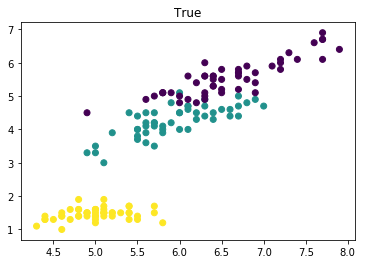

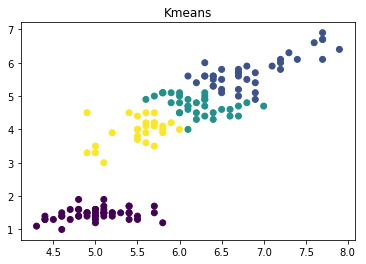

In [25]:
plt.scatter(x_data[:,0],x_data[:,1],c=15*y)
plt.title("True")
plt.show()

plt.scatter(x_data[:,0],x_data[:,1],c=15*km_cluster)
plt.title("Kmeans")
plt.show()

# 二、GMM聚类

## 1. 数据处理
### 1.1 导入数据

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
data=pd.read_csv(r"E:\ML\Kmeans\iris.data")
data.columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm	","PetalWidthCm","Species"]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### 1.2 获取x数据集
注：实验要求使用SepalLength，SepalWidth作为分类依据

In [166]:
x_data=np.array(data.iloc[:,[0,2]])
y=np.array(data["Species"])
class_label={"Iris-virginica":0,"Iris-versicolor":1,"Iris-setosa":2}
for i in range(len(y)):
    y[i]=class_label[y[i]]

## 2.GMM

### 2.1 GMM函数模块

In [171]:
from scipy.stats import multivariate_normal
N=multivariate_normal.pdf #混合高斯分布函数

def initialize(x_data,k=3):                       #随机初始化参数
    '''
    函数初始化；
    输入：x：维度；k：簇类数
    返回：yk:类概率。means：各高斯分布的均值向量。cov：各高斯分布协方差矩阵。
    '''
    _,n=x_data.shape
    yk=np.random.dirichlet(np.zeros(k))# 随机动初始化
    means=np.random.rand(k,n)
    cov=np.random.randn(k,n,n)
    cov[0]=np.array([[1.0,0.0],[0.0,2.0]])#手动初始化
    cov[1]=np.array([[2.0,0.0],[0.0,1.0]])
    cov[2]=np.array([[1.5,0.0],[0.0,1.0]])
    return yk,means,cov

def KM_init(x_data,km_label,k=3):                       #利用Kmeans初始化参数
    m,n=x_data.shape
    yk=np.zeros(k)
    means=np.random.rand(k,n)
    cov=np.random.randn(k,n,n)
    cluster={key:[] for key in range(k)}
    for index,i in enumerate(x_data):
         cluster[km_label[index]].append(i)
    for index in range(k):
        k_cluster=np.array(cluster[index])
        yk[index]=k_cluster.shape[0]/m
        means[index]=k_cluster.mean(axis=0)
        cov[index]=np.cov(k_cluster.reshape(n,-1))
    return yk,means,cov

def E_step(x_data,yk,means,cov,k=3):         #E步
    '''
    根据已知参数求rk。rk：k对观测数据xj响应度
    rk是一个m*k的矩阵，（i，k）表示k簇对样本i响应度
    '''
    m,n=x_data.shape
    r_k=np.random.rand(m,k)
    for i in range(m):
        for j in range(k):
            r_k[i][j]=yk[j]*N(x_data[i],mean=means[j],cov=cov[j])
        r_k[i]=r_k[i]/r_k[i].sum()
    return r_k

def M_step(x_data,r_k,k=3):                 #M步
    '''
    根据E步返回rk更新参数。
    代入更新公式即可
    '''
    m,n=x_data.shape
    yk=np.zeros(k)
    means=np.zeros(k*n).reshape(k,n)
    cov=np.zeros(k*n*n).reshape(k,n,n)
    Nk=r_k.sum(axis=0)
    for i in range(k):
        for j in range(m):
            means[i]+=r_k[j][i]*x_data[j]
        means[i]=means[i]/Nk[i]
    for i in range(k):
        for j in range(m):
            cov[i]+=r_k[j][i]*np.dot((x_data[j]-means[i]).reshape(-1,1),(x_data[j]-means[i]).reshape(1,-1))
        cov[i]=cov[i]/Nk[i]
    yk=Nk/m
    return yk,means,cov

def get_cluster(rk): # 获得真实的分类
    m=rk.shape[0]
    classify=np.zeros(m)
    for i in range(m):
        classify[i]=np.argmax(rk[i])
    return classify

## 2.2 GMM函数

In [172]:
def Gmm(x_data,echo=10,k=3):
    yk,means,cov=KM_init(x_data,km_cluster)
    for i in range(echo):
        rk=E_step(x_data,yk,means,cov)
        yk,means,cov=M_step(x_data,rk)
    return rk,yk,means,cov

## 2.3 聚类并绘制簇类图

In [177]:
rk,yk,means,cov=Gmm(x_data)
gmm_cluster=get_cluster(rk)
print("GMM聚类：")
gmm_cluster

GMM聚类：


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1.])

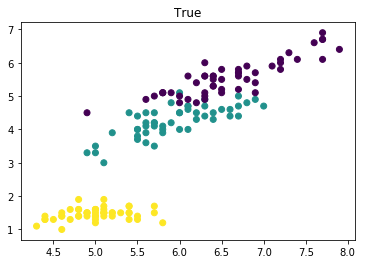

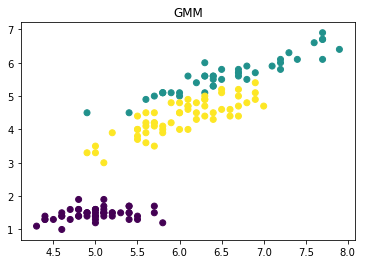

In [174]:
plt.scatter(x_data[:,0],x_data[:,1],c=15*y)
plt.title("True")
plt.show()

plt.scatter(x_data[:,0],x_data[:,1],c=15*gmm_cluster)
plt.title("GMM")
plt.show()